# Assignment-2: Manifold Learning

The objective of this assignment is to apply the concepts you have learned in class on Manifold Learning and Spectral Clustering. 

## Instructions
  - For each question you need to write the sub-problem formulation in markdown. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagiarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file.

__NOTE__: If you use online platforms, you will have to upload `swissroll.dat` file separately and change the path in the code cell which loads the data.

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems 
 - Question 1: Spectral Clustering (10 marks)
 - Question 2: Manifold Visualization (10 marks)
 - Question 3: Clustering and Visualizing high-dimensional data (10 marks)
 - Question 4: Classification (10 marks)

## Deadline 
The deadline of this assignment is 27th April, 2020, 11:59 PM

In [ ]:
import sys
# Install packages correctly
!{sys.executable} -m pip install numpy sklearn tensorflow keras
# Fix mpl version due to subtle API differences
!{sys.executable} -m pip install matplotlib==3.0.3

import numpy
# Allow usage of both `np` and `numpy`
np = numpy
import sklearn
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.utils.graph import graph_shortest_path
from sklearn.cluster import KMeans
from scipy.sparse import csgraph
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg
from scipy.linalg import eigh
import matplotlib

     |████████████████████████████████| 13.0MB 273kB/s 
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1


# Question 1: Spectral Clustering

Implement spectral clustering and evaluate on the given concentric circles dataset for this question.

## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



In [ ]:
# Part 1: Spectral Clustering
def spectral_clustering(X,k):
  """Args:
    X: numpy.array [num_samples, input_dim]
    
    Returns:
    Y_pred: numpy.array [num_samples]
      array of cluster labels
  """
  # Your code here
  A = kneighbors_graph(X, n_neighbors=k).toarray()
  D = np.diag(A.sum(axis=1))
  L = D-A
  L_temp = L
  evals = np.linalg.eig(L_temp)[0]
  evecs = np.linalg.eig(L_temp)[1]
  evecs = evecs[:,np.argsort(evals)]
  evals = evals[np.argsort(evals)]
  Y = evecs[:,1] > 0
  
  predictedY = []
  len_Y = len(Y)
  for i in range(len_Y):
    if Y[i] != True:
      predictedY.append(0)
    else:
      predictedY.append(1)
  retY = predictedY
  return retY

## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [ ]:
# DO NOT EDIT

from sklearn.datasets import make_circles 

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]

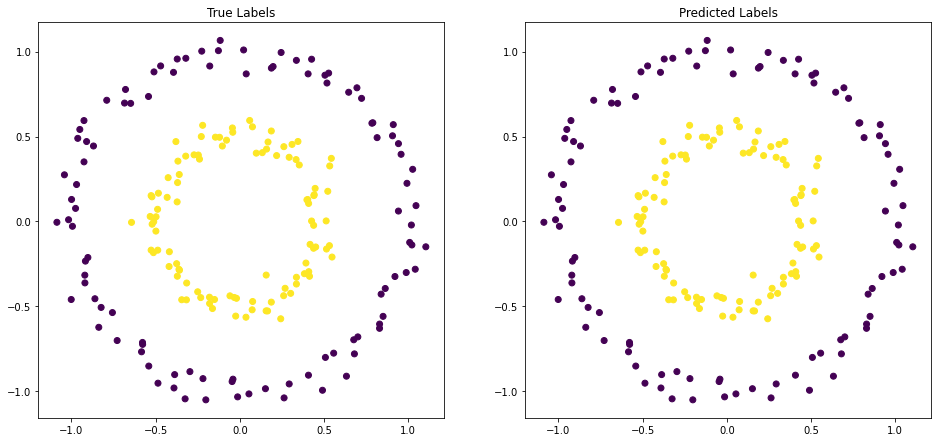

In [ ]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot("221")
ax.set_title('True Labels')
ax.scatter(CX[:,0],CX[:,1],c=CY)

knn = 6
predicted_Y = spectral_clustering(CX,knn)

ax = fig.add_subplot("222")
ax.set_title('Predicted Labels')
ax.scatter(CX[:,0],CX[:,1],c=predicted_Y)
plt.show()

## Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

Accuracy : 100.0 %


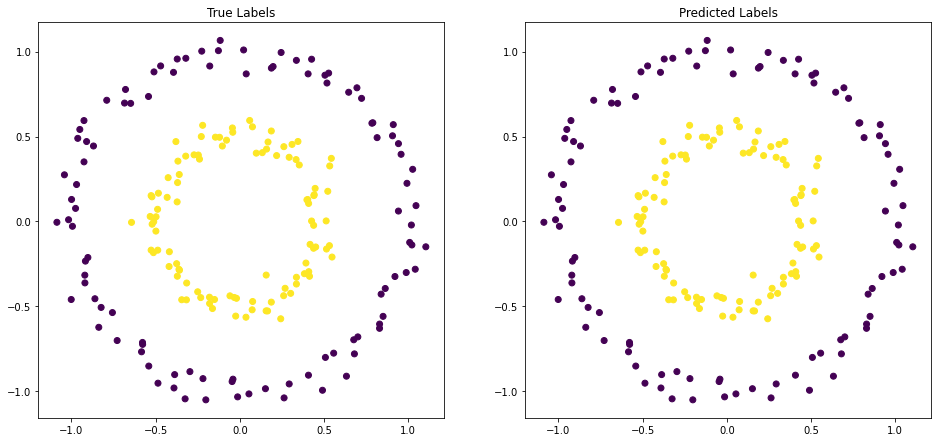

In [ ]:
# Part 3: Report the accuracy of clustering
matches = []
for i in range(CY.shape[0]):
  if CY[i] == predicted_Y[i]:
    matches.append(predicted_Y[i])
matches_len = len(matches)
precent_accuracy = (matches_len*100.0)/(CY.shape[0])
print("Accuracy :",precent_accuracy,"%")

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot("221")
ax.set_title('True Labels')
ax.scatter(CX[:,0],CX[:,1],c=CY)

knn = 6
predicted_Y = spectral_clustering(CX,knn)

ax = fig.add_subplot("222")
ax.set_title('Predicted Labels')
ax.scatter(CX[:,0],CX[:,1],c=predicted_Y)
plt.show()



---



# Question 2: Manifold Visualization
Implement the various manifold learning methods and visualize the given datasets.


## Part 1: MDS
Implement Multi-Dimensional Scaling

In [ ]:
# Part 1: MDS

def MDS(X,k,output_dim=2):
  """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
  """
  # Your code here
  D = pairwise_distances(X)
  stress = lambda d: ((D-d)**2).sum()
  n,m = X.shape
  x_m = np.random.rand(n, 2)
  d = pairwise_distances(x_m)
  stress_old = stress(d)

  for i in range(2000):
    copy_d = d.copy()
    copy_D = D.copy()
    copy_d[copy_d==0.0] = np.inf
    B = copy_D/copy_d
    np.fill_diagonal(B, 0.0)
    B[range(copy_D.shape[0]),range(copy_D.shape[0])] = -B.sum(axis=0).T
    B_xm_mul = B.dot(x_m)
    x_min = B_xm_mul/n
    d = pairwise_distances(x_min)
    stress_new = stress(d)
    if stress_old-stress_new >= 0.0001:
        stress_old = stress_new
        x_m = x_min
    else:
        break
  return x_min

## Part 2: LLE
Implement Locally Linear Embedding function

In [ ]:
# Part 2: LLE

def LLE(X, k, output_dim=2):
  """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
  """
  # Your code here
  nt = X.shape [0]
  pt = X.shape [1] 
  Weights_final = np.zeros((nt,nt))
  knn_mat = neighbors.NearestNeighbors(k+1, metric = "euclidean", algorithm="ball_tree").fit(X)
  distances, near_p = knn_mat.kneighbors(X)
  nearest_p = near_p[:,1:]
  
  for i in range(nt):
      nearX = X[nearest_p[i],:] - X[i]
      nearCov = np.dot(nearX, nearX.T)
      
      #regularization
      if np.trace(nearCov) <= 0 :
          R = 0.001
      else:
          R = 0.001*np.trace(nearCov)
      
      nearCov.flat[::k+1] += R
      t_weights = linalg.solve(nearCov, np.ones(k).T, sym_pos=True)
      sum_tweights = t_weights.sum()
      normalweights = t_weights/sum_tweights
      Weights_final[i, nearest_p[i]] = normalweights
  
  nk = Weights_final.shape[0]
  pk = Weights_final.shape[1]
  I = np.eye(nk)
  m = (I-Weights_final)
  M = m.T.dot(m)
  
  Y_eigvals, Y_eigvecs = eigh(M, eigvals=(1, 2), overwrite_a=True)
  ind = np.argsort(np.abs(Y_eigvals))
  Y = Y_eigvecs[:, ind]

  return Y

## Part 3: ISOMAP
Implement Isomap Visualization  

In [ ]:
# Part 3: Isomap

def ISOMAP(X, k, output_dim=2):
  """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
  """
  
  # Your code here
  n = X.shape[0]
  p = X.shape[1]
  knn = NearestNeighbors(k).fit(X)
  distance, t_neighbors = knn.kneighbors(X)
  neighbors = t_neighbors[:, 1:]
  
  graph = kneighbors_graph(X, k, mode='distance').toarray()
  
  D_proximity = sklearn.utils.graph_shortest_path.graph_shortest_path(graph)
  
  D_proximity = np.square(D_proximity)

  I_n = np.eye(n)
  J_n1 = np.ones((n, 1))
  J_1n = np.ones((1, n))
  J_nn = J_n1*J_1n
  J_normal = J_nn/n
  J = I_n - J_normal
  B = (-(1/2)) * J @ D_proximity @ J
  eigval, eigvec = np.linalg.eig(B)
  idx = eigval.argsort()[::-1]   
  eigval = eigval[idx]
  eigvec = eigvec[:,idx]
  dim = 2
  X_prime = eigvec[:, :dim]
  return X_prime.real

## Part 3: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS, ISOMAP, LLE

In [ ]:
# DO NOT EDIT

from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

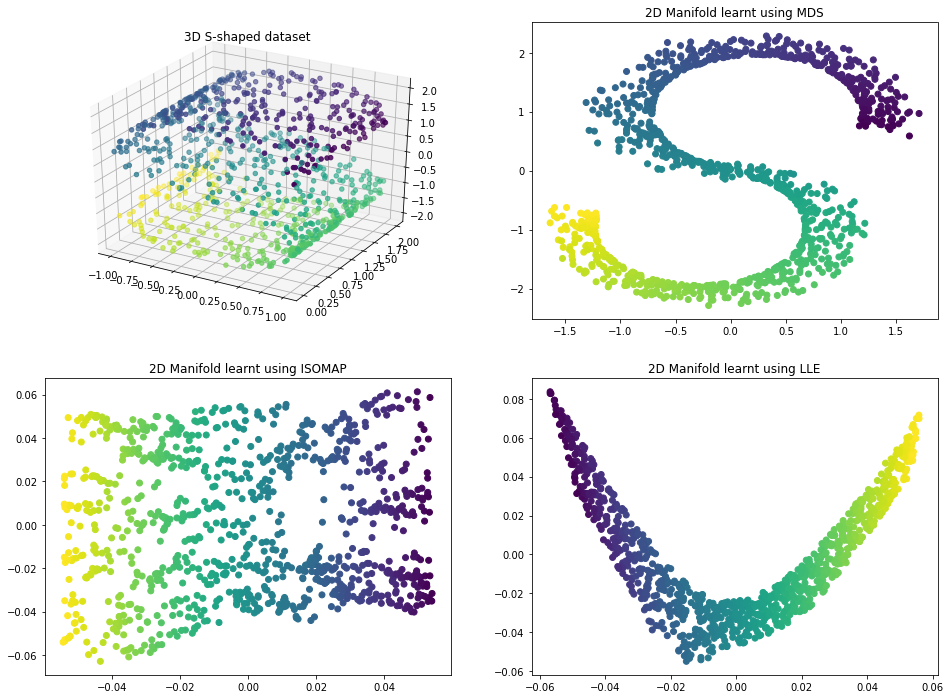

In [ ]:
#  Visualization code here

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot("221", projection = "3d")
ax.set_title('3D S-shaped dataset')
ax.scatter(SX[:,0],SX[:,1],SX[:,2],c=St)

# 2. 2D Manifold learnt using MDS
X_mds = MDS(SX,10)
ax = fig.add_subplot("222")
ax.set_title('2D Manifold learnt using MDS')
ax.scatter(X_mds[:,0],X_mds[:,1],c=St)

# 3. 2D Manifold learnt using ISOMAP
X_iso = ISOMAP(SX,10)
ax = fig.add_subplot("223")
ax.set_title('2D Manifold learnt using ISOMAP')
ax.scatter(X_iso[:,0],X_iso[:,1],c=St)

# 4. 2D Manifold learnt using LLE
X_lle = LLE(SX,10)
ax = fig.add_subplot("224")
ax.set_title('2D Manifold learnt using LLE')
ax.scatter(X_lle[:,0],X_lle[:,1],c=St)
plt.show()


# Question 3: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using the above 3 methods. State your observations.

In [ ]:
# Swiss roll dataset loading here
d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)

(1600, 3)


Procedure for this question:
1. Perform spectral clustering (2 clusters) on the unchanged Swiss roll and visualize (binary colors)
2. Unwrap the manifold in 2D and visualize using
  - MDS
  - ISOMAP
  - LLE

Use the labels from the spectral clustering to color the unwrapped manifolds.

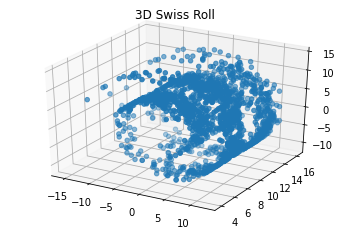

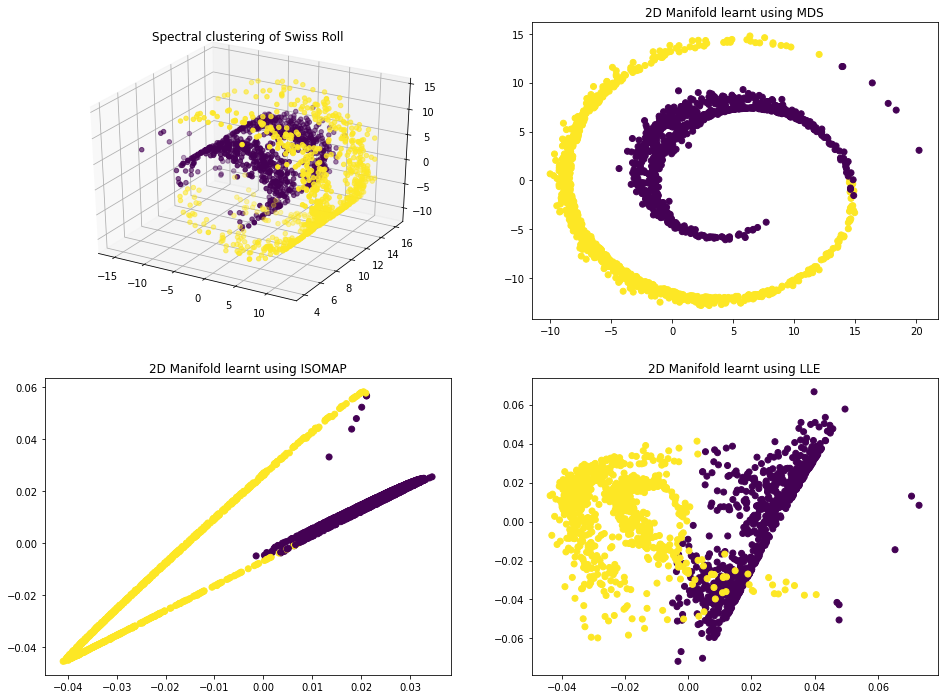

In [ ]:
# CODE HERE

# Part 1
fig1 = matplotlib.pyplot.figure()
ax1 = fig1.add_subplot(111, projection='3d')
matplotlib.pyplot.title('3D Swiss Roll')
ax1.scatter(swissroll[:,0],swissroll[:,1],swissroll[:,2])
plt.show()

labels = spectral_clustering(swissroll,10)
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot("221", projection = "3d")
ax.set_title('Spectral clustering of Swiss Roll')
ax.scatter(swissroll[:,0],swissroll[:,1],swissroll[:,2],c=labels)

# Part 2

# MDS
X_mds = MDS(swissroll,10)
ax = fig.add_subplot("222")
ax.set_title('2D Manifold learnt using MDS')
ax.scatter(X_mds[:,0],X_mds[:,1],c=labels)

# ISOMAP
X_iso = ISOMAP(swissroll,25)
ax = fig.add_subplot("223")
ax.set_title('2D Manifold learnt using ISOMAP')
ax.scatter(X_iso[:,0],X_iso[:,1],c=labels)

# LLE
X_lle = LLE(swissroll,25)
ax = fig.add_subplot("224")
ax.set_title('2D Manifold learnt using LLE')
ax.scatter(X_lle[:,0],X_lle[:,1],c=labels)

plt.show()

**Observations:**
Here we can see that inner part of the roll is classified as one cluster, and outer part as another. This clustering is good as if we follow the curve of 
the roll starting from the innermost point, we will go from one class to the next only once and then remain in the second class.
This shows that spectral clustering is more aware of the structure of the data. lt is hence able to seperate the inner and outer parts of the 
roll.
Spectral clustering form clusters better in this case as compared to K-Means. But spectral clustering is computationally expensive, since ${NXN}$ is formed for similarity.



---



# Question 4: Classification

Perform classification using a machine learning algorithm of your choice. Use 6k images from CIFAR-10 dataset.(5k images for training and 1k images for testing.)


*   Do dimensionality reduction on the dataset using PCA and ISOMAP.
*   Apply the classification algorithm.
*   Compare the results by changing the dimensionality of the data.
*   Use F1-score as metric.
*   Approach: Reduce the dimensionality into any two dimensions(of your choice) which are less than the initial dimensionality of the data using PCA and ISOMAP. Compare the performance metrics(F1-score) for the low dimensional data.



In [ ]:
# Code for loading CIFAR-10 dataset.
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:5000].reshape([5000,32*32*3])
y_train = y_train[:5000]
X_test = X_test[:1000].reshape([1000,32*32*3])
y_test = y_test[:1000]
# Initial dimensionality/number of features (32*32*3) = 3072.

Using TensorFlow backend.


170500096/170498071 [==============================] - 14s 0us/step


In [ ]:
def reductionUsingPCA(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    pca_X: numpy.array [n_samples, output_dim]
    """
    from sklearn.decomposition import PCA
    pca = PCA(output_dim)
    pca_X = pca.fit_transform(X)
    return pca_X

In [ ]:
def reductionUsingISOMAP(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    isomap_X: numpy.array [n_samples, output_dim]
    """
    from sklearn.manifold import Isomap
    embedding = Isomap(n_neighbors=k, n_components=output_dim)
    isomap_X = embedding.fit_transform(X)
    return isomap_X

In [ ]:
def classification(X_train, y_train, X_test, n_classes):
    """Args:
    X: numpy.array [n_samples, input_dim]
    n_classes: number of classes

    Returns:
    labels: numpy_array [n_samples]
    """
    from sklearn.svm import SVC
    # np.ravel() used to remove warning
    svm = SVC(kernel = 'poly', C = 1.0).fit(X_train, np.ravel(y_train)) 
    labels = svm.predict(X_test) 
    
    return labels

In [ ]:
def F1_score(y_true, y_pred):
    """Args:
    y_true: numpy.array [n_samples] , ground truth value
    y_pred: numpy.array [n_samples] , predicted value by classifier

    Returns:
    score: float, f1-score
    """
    from sklearn.metrics import f1_score
    score = f1_score(y_true, y_pred,average='micro')
    return score

In [ ]:
X_combined = np.vstack((X_train, X_test))

X_isomap_low_d = reductionUsingISOMAP(X_combined,5,128)
X_train_isomap_low_d = X_isomap_low_d[:5000,:]
X_test_isomap_low_d = X_isomap_low_d[5000:,:]

X_pca_low_d = reductionUsingPCA(X_combined,5,128)
X_train_pca_low_d = X_pca_low_d[:5000,:]
X_test_pca_low_d = X_pca_low_d[5000:,:]

X_isomap_high_d = reductionUsingISOMAP(X_combined,5,1024)
X_train_isomap_high_d = X_isomap_high_d[:5000,:]
X_test_isomap_high_d = X_isomap_high_d[5000:,:]

X_pca_high_d = reductionUsingPCA(X_combined,5,1024)
X_train_pca_high_d = X_pca_high_d[:5000,:]
X_test_pca_high_d = X_pca_high_d[5000:,:]

In [ ]:
labels_pca_low_d = classification(X_train_pca_low_d, y_train, X_test_pca_low_d,10)
labels_isomap_low_d = classification(X_train_isomap_low_d, y_train, X_test_isomap_low_d,10)

labels_pca_high_d = classification(X_train_pca_high_d, y_train, X_test_pca_high_d,10)
labels_isomap_high_d = classification(X_train_isomap_high_d, y_train, X_test_isomap_high_d,10)

In [ ]:
print("PCA score for low dimensions(128) :", F1_score(y_test,labels_pca_low_d))
print("ISOMAP score for low dimensions(128) :", F1_score(y_test,labels_isomap_low_d))

print("PCA score for high dimensions(1024) :", F1_score(y_test,labels_pca_high_d))
print("ISOMAP score for high dimensions(1024) :", F1_score(y_test,labels_isomap_high_d))

PCA score for low dimensions(128) : 0.345
ISOMAP score for low dimensions(128) : 0.277
PCA score for high dimensions(1024) : 0.333
ISOMAP score for high dimensions(1024) : 0.253


**Comparision:**
In accordance to the question I have reduced the initial dimensions to 128 (low dimension) and 1024 (high dimension) which are less than the initial dimension (3072). For both the cases, we observe that the score of PCA is greater than the score of ISOMAP. This is an expected result as ISOMAP reduces the dimension such that the data in lower dimensions is very close to the data in higher dimensions in correspondence to visualisation. But this is a ciassification task, therefore classes in the lower dimensions must be well seperable. Also, PCA is better than ISOMAP when it comes to preserve the inter class variance. 

Therefore, PCA performs better than ISOMAP in ciassification tasks.
ISOMAP is used for estimating the intrinsic geometry of the manifold based on rough estimate of each data point neighbors. Using ISOMAP in CIFAR-10 may not be a good idea, beacuse there might be no such intrinsic geometry present in the dataset. That's why accuracy of ISOMAP is less than PCA.